In [ ]:
#Use some common sense to answer the first question. Which columns or (independent) variables
# would significantly influence the Y value (whether someone fulfills the terms of credit agreement
# or not)? List at least three and explain why?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/STAT_312/Homework/bank.csv'
df = pd.read_csv(path)
print(df.info())
df.dropna(inplace = True)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHK_ACCT          1000 non-null   int64
 1   DURATION          1000 non-null   int64
 2   HISTORY           1000 non-null   int64
 3   NEW_CAR           1000 non-null   int64
 4   USED_CAR          1000 non-null   int64
 5   FURNITURE         1000 non-null   int64
 6   RADIO/TV          1000 non-null   int64
 7   EDUCATION         1000 non-null   int64
 8   RETRAINING        1000 non-null   int64
 9   AMOUNT            1000 non-null   int64
 10  SAV_ACCT          1000 non-null   int64
 11  EMPLOYMENT        1000 non-null   int64
 12  INSTALL_RATE      1000 non-null   int64
 13  MALE_DIV          1000 non-null   int64
 14  MALE_SINGLE       1000 non-null   int64
 15  MALE_MAR_or_WID   1000 non-null   int64
 16  CO-APPLICANT      1000 non-null   int64
 17  GUARANTOR         1000 non-null   

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,1
996,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,1
997,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,1
998,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,0


In [ ]:
#Question 1

#JOB - employment status or job security is a significant factor, as people with steady jobs are more likely to mmake consistent payments

#CHK_ACCT = This will indicate the status of the person's checking account. People with more stable acount balances might be more likely to fulfill their credit agreements

#HISTORY = A person's credit hsitory can show how likely they can fulfill credit agreements.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Question 2 What are some general findings from basic (descriptive) statistics from the dataset? Describe

df.describe()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,3271.258000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.700000
std,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,2822.736876,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1365.500000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.500000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3972.250000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18424.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [ ]:
#Question 2 answer


# The dataset shows that most people have a stable checking account,
# with loan durations averaging 21 months but going up to 6 years.
# The loan amounts vary a lot, from small loans of $250 to large loans over $18,000.
# People in the dataset are mostly around 35 years old, with ages ranging from 19 to 75.
# About 70% own their homes, which suggests they might be financially stable.
# Around 70% of people pay back their loans, while 30% do not.
# Overall, the data includes a mix of different financial situations and credit histories.

In [ ]:
# Question 3 What portion of borrowers have paid back? What portion have defaulted on their loans?

#70% of the borrowers have paid back their loans, while 30% have defaulted, based on the calculated RESPONSE average

df['RESPONSE'].mean()

0.7

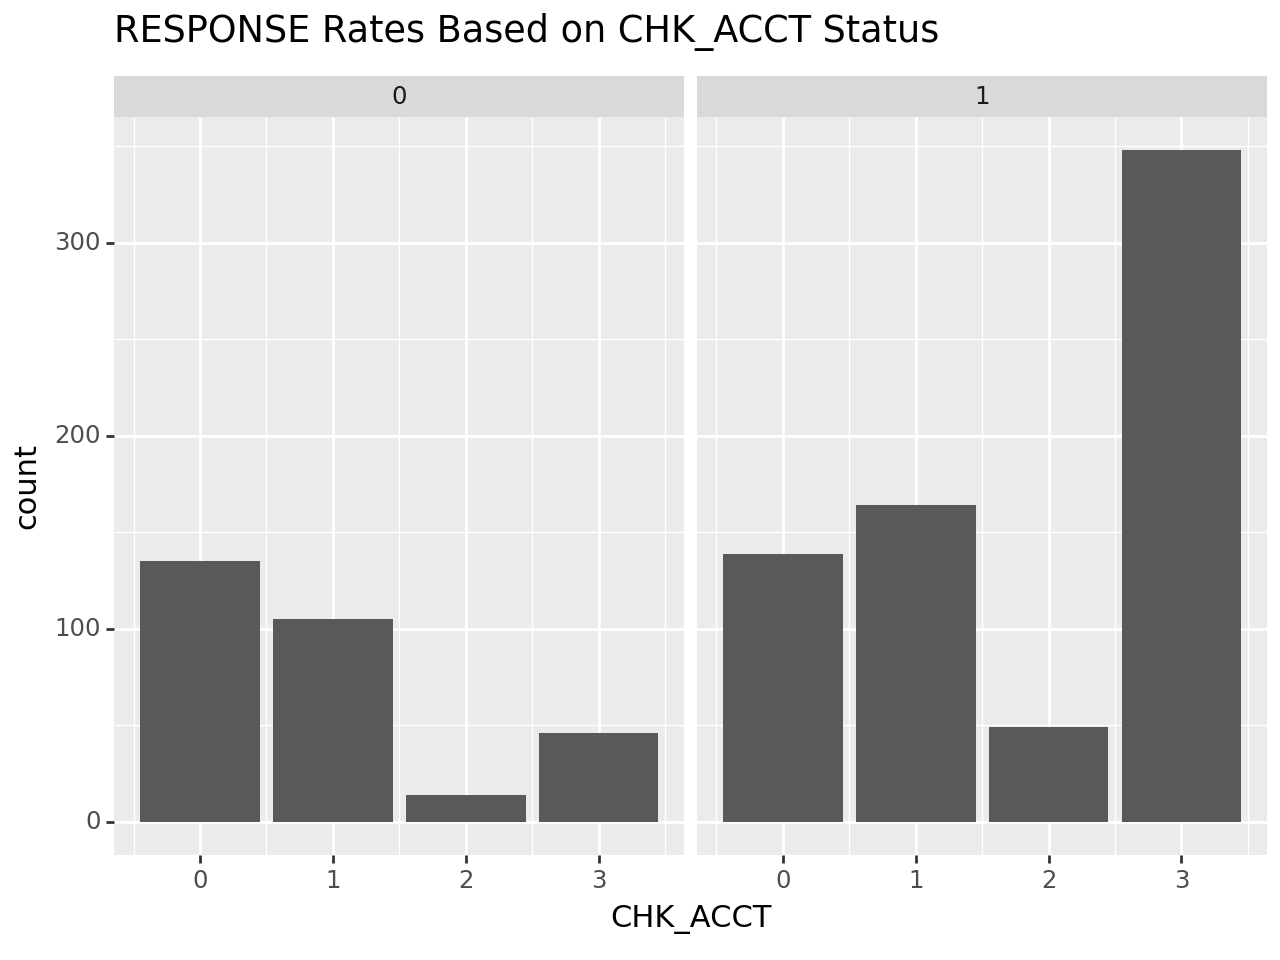

<Figure Size: (640 x 480)>

In [ ]:
#What is the relationship between RESPONSE and three other variables

# Relationship between RESPONSE and CHK_ACCT (Checking Account Status)


(ggplot(df)
 + facet_grid(facets="~RESPONSE")
 + aes(x='CHK_ACCT')
 + geom_bar()
 + ggtitle("RESPONSE Rates Based on CHK_ACCT Status")
)

#The correlation between CHK_ACCT and RESPONSE seem to have a positive relationship.
#I do think that this status does have a significant affect to the RESPONSE rates, however
#it is not a super huge factor as it is at 0.3

In [ ]:
chk_acct_dummies = pd.get_dummies(df['CHK_ACCT'], prefix='CHK_ACCT', dtype=float)
df = df.join(chk_acct_dummies)
df

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE,CHK_ACCT_0,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3
0,0,6,4,0,0,0,1,0,0,1169,...,2,2,1,1,0,1,1.0,0.0,0.0,0.0
1,1,48,2,0,0,0,1,0,0,5951,...,1,2,1,0,0,0,0.0,1.0,0.0,0.0
2,3,12,4,0,0,0,0,1,0,2096,...,1,1,2,0,0,1,0.0,0.0,0.0,1.0
3,0,42,2,0,0,1,0,0,0,7882,...,1,2,2,0,0,1,1.0,0.0,0.0,0.0
4,0,24,3,1,0,0,0,0,0,4870,...,2,2,2,0,0,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,...,1,1,1,0,0,1,0.0,0.0,0.0,1.0
996,0,30,2,0,1,0,0,0,0,3857,...,1,3,1,1,0,1,1.0,0.0,0.0,0.0
997,3,12,2,0,0,0,1,0,0,804,...,1,2,1,0,0,1,0.0,0.0,0.0,1.0
998,0,45,2,0,0,0,1,0,0,1845,...,1,2,1,1,0,0,1.0,0.0,0.0,0.0


In [ ]:
df.corr(numeric_only = True)

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE,CHK_ACCT_0,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3
CHK_ACCT,1.000000,-0.072013,0.192191,-0.069559,0.064303,-0.098016,0.110632,0.007848,0.021587,-0.042705,...,0.076005,0.040663,-0.014145,0.066296,-0.026758,0.350847,-0.770727,-0.278455,0.087257,0.912806
DURATION,-0.072013,1.000000,-0.077186,-0.109999,0.144939,-0.062804,-0.044319,0.003750,0.164113,0.624984,...,-0.011284,0.210910,-0.023834,0.164718,-0.138196,-0.214927,0.022244,0.089452,-0.076455,-0.063467
HISTORY,0.192191,-0.077186,1.000000,0.042480,0.039096,-0.025539,0.021396,0.054039,-0.090091,-0.059905,...,0.437066,0.010350,0.011550,0.052370,0.013873,0.228785,-0.106309,-0.109580,-0.008877,0.200894
NEW_CAR,-0.069559,-0.109999,0.042480,1.000000,-0.187291,-0.259831,-0.344672,-0.126799,-0.181149,-0.040793,...,0.035845,-0.088711,0.102663,-0.036275,0.154436,-0.096900,0.073527,-0.015692,0.012230,-0.058954
USED_CAR,0.064303,0.144939,0.039096,-0.187291,1.000000,-0.159301,-0.211317,-0.077740,-0.111062,0.252101,...,-0.005248,0.180730,0.054862,0.136693,-0.031564,0.099791,-0.016390,-0.049760,-0.060785,0.090342
FURNITURE,-0.098016,-0.062804,-0.025539,-0.259831,-0.159301,1.000000,-0.293164,-0.107850,-0.154078,-0.034037,...,-0.070478,0.013422,-0.086515,-0.053587,-0.009590,-0.020971,0.130479,-0.056750,-0.004308,-0.065454
RADIO/TV,0.110632,-0.044319,0.021396,-0.344672,-0.211317,-0.293164,1.000000,-0.143066,-0.204388,-0.173203,...,-0.030706,-0.027683,-0.082464,-0.082243,-0.063242,0.106922,-0.113454,-0.001607,0.058300,0.076027
EDUCATION,0.007848,0.003750,0.054039,-0.126799,-0.077740,-0.107850,-0.143066,1.000000,-0.075191,-0.007388,...,-0.010728,-0.001405,0.041204,0.016831,-0.044969,-0.070088,-0.007201,-0.004656,0.016052,0.002817
RETRAINING,0.021587,0.164113,-0.090091,-0.181149,-0.111062,-0.154078,-0.204388,-0.075191,1.000000,0.103016,...,0.084980,0.001614,-0.000327,0.088221,-0.046343,-0.036129,-0.087712,0.105967,-0.015451,-0.008422
AMOUNT,-0.042705,0.624984,-0.059905,-0.040793,0.252101,-0.034037,-0.173203,-0.007388,0.103016,1.000000,...,0.020795,0.285385,0.017142,0.276995,-0.050050,-0.154739,-0.020912,0.119612,-0.100510,-0.039485


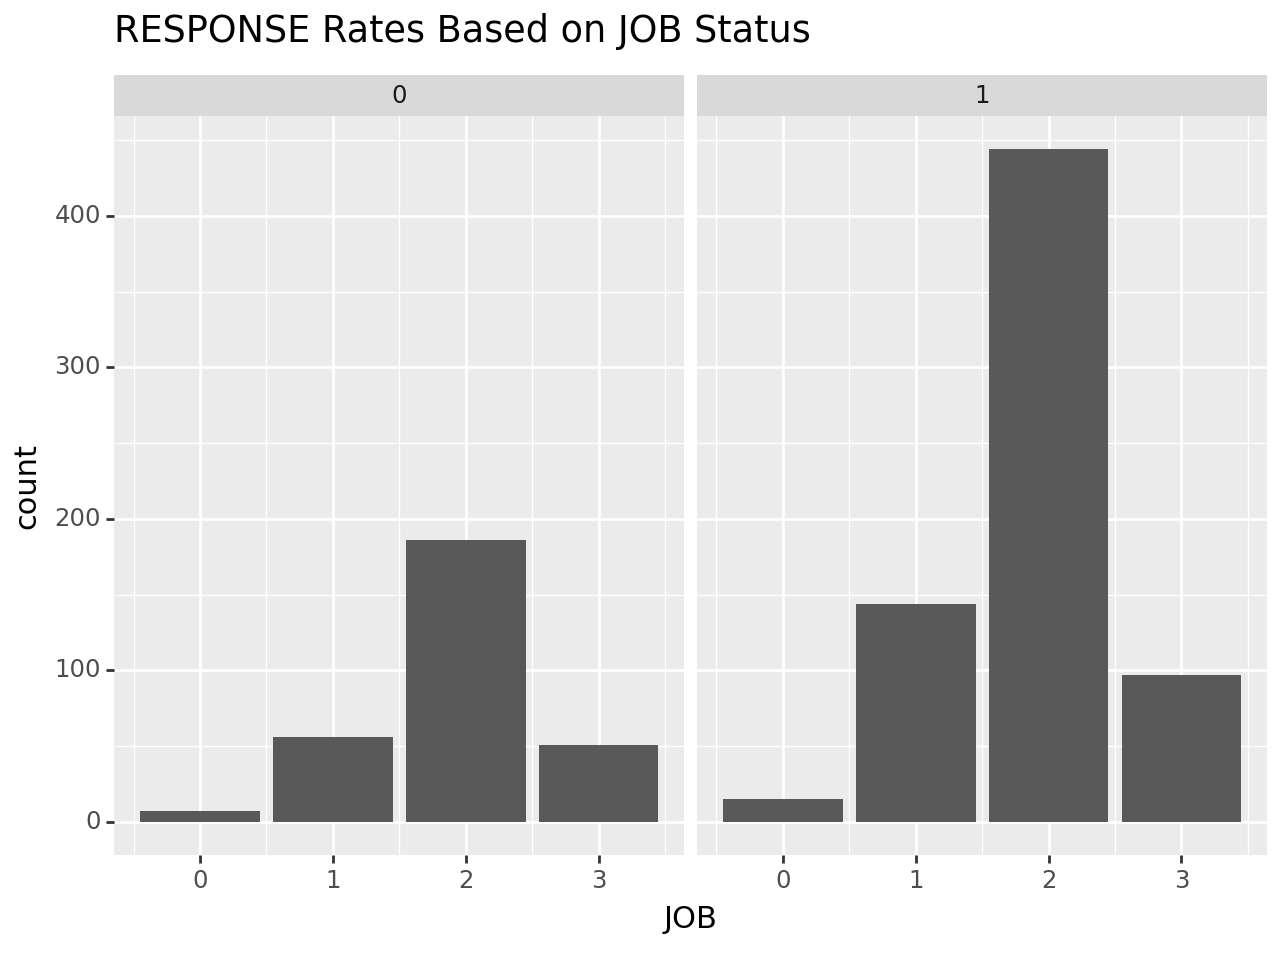

<Figure Size: (640 x 480)>

In [ ]:
# Relationship between RESPONSE and JOB
(ggplot(df)
 + facet_grid(facets="~RESPONSE")
 + aes(x='JOB')
 + geom_bar()
 + ggtitle("RESPONSE Rates Based on JOB Status")
)

#0.04 correlation is very weak. I believe the correlation between these two
#variables is very low, meaning there is no significant relationship between JOB and Response.

In [ ]:
job_dummies = pd.get_dummies(df['JOB'], prefix='JOB', dtype=float)
df = df.join(job_dummies)
df

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,DURATION_45,DURATION_47,DURATION_48,DURATION_54,DURATION_60,DURATION_72,JOB_0,JOB_1,JOB_2,JOB_3
0,0,6,4,0,0,0,1,0,0,1169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,48,2,0,0,0,1,0,0,5951,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,12,4,0,0,0,0,1,0,2096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,42,2,0,0,1,0,0,0,7882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,24,3,1,0,0,0,0,0,4870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
996,0,30,2,0,1,0,0,0,0,3857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,3,12,2,0,0,0,1,0,0,804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,0,45,2,0,0,0,1,0,0,1845,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.corr(numeric_only = True)

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,DURATION_45,DURATION_47,DURATION_48,DURATION_54,DURATION_60,DURATION_72,JOB_0,JOB_1,JOB_2,JOB_3
CHK_ACCT,1.000000,-0.072013,0.192191,-0.069559,0.064303,-0.098016,0.110632,7.847898e-03,0.021587,-0.042705,...,-5.509722e-02,-0.039693,-0.058413,0.015064,0.003505,-0.014523,-0.047152,-0.040573,0.055183,-0.009848
DURATION,-0.072013,1.000000,-0.077186,-0.109999,0.144939,-0.062804,-0.044319,3.749748e-03,0.164113,0.624984,...,1.417259e-01,0.068505,0.504819,0.122928,0.372280,0.134130,-0.044043,-0.181203,0.055010,0.147515
HISTORY,0.192191,-0.077186,1.000000,0.042480,0.039096,-0.025539,0.021396,5.403861e-02,-0.090091,-0.059905,...,-9.494723e-03,-0.015928,-0.087115,-0.105239,-0.017003,-0.015928,-0.006234,-0.006928,0.003157,0.006087
NEW_CAR,-0.069559,-0.109999,0.042480,1.000000,-0.187291,-0.259831,-0.344672,-1.267993e-01,-0.181149,-0.040793,...,-3.918023e-02,0.057243,-0.046761,-0.024742,0.040828,-0.017487,0.094233,0.072041,-0.085223,-0.004204
USED_CAR,0.064303,0.144939,0.039096,-0.187291,1.000000,-0.159301,-0.211317,-7.774019e-02,-0.111062,0.252101,...,2.262197e-02,-0.010721,0.047033,0.058469,-0.038890,-0.010721,-0.028395,-0.111857,-0.033321,0.183035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DURATION_72,-0.014523,0.134130,-0.015928,-0.017487,-0.010721,-0.014874,0.050735,-7.258393e-03,-0.010370,0.026059,...,-2.242801e-03,-0.001001,-0.007104,-0.001416,-0.003631,1.000000,-0.004745,-0.015819,0.024246,-0.013186
JOB_0,-0.047152,-0.044043,-0.006234,0.094233,-0.028395,-0.052801,-0.063164,-3.128041e-03,-0.003087,-0.027969,...,-1.063201e-02,-0.004745,-0.001786,-0.006714,-0.017213,-0.004745,1.000000,-0.074991,-0.195709,-0.062511
JOB_1,-0.040573,-0.181203,-0.006928,0.072041,-0.111857,-0.020778,0.005568,2.666418e-18,0.005068,-0.161757,...,-7.870162e-18,0.063277,-0.077187,0.033575,-0.035313,-0.015819,-0.074991,1.000000,-0.652438,-0.208392
JOB_2,0.055183,0.055010,0.003157,-0.085223,-0.033321,0.064393,0.085802,4.751733e-03,-0.007768,-0.092636,...,2.496038e-02,-0.041284,0.036432,-0.012054,-0.040044,0.024246,-0.195709,-0.652438,1.000000,-0.543852


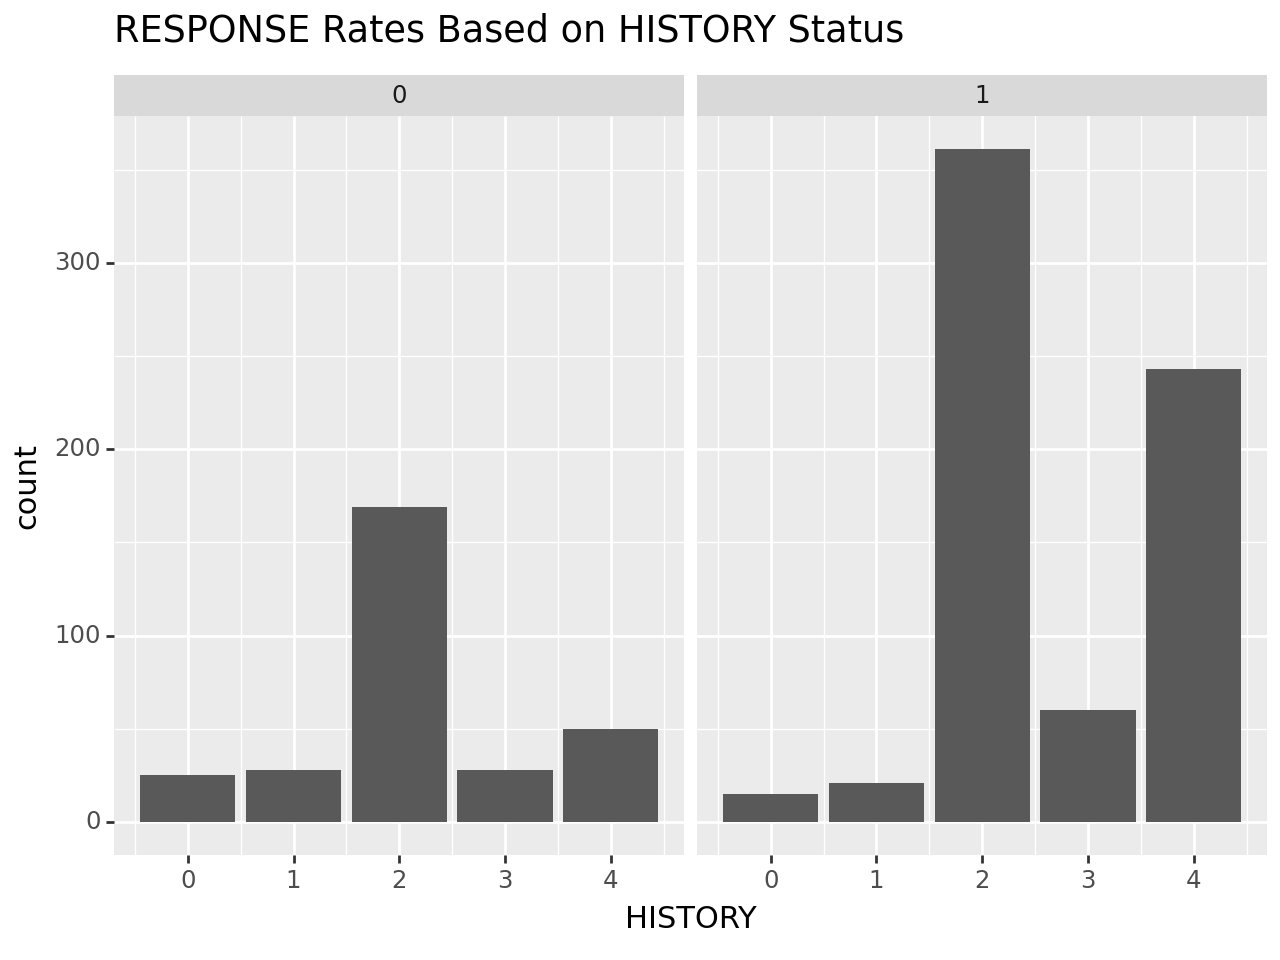

<Figure Size: (640 x 480)>

In [ ]:
# Relationship between RESPONSE and HISTORY
(ggplot(df)
 + facet_grid(facets="~RESPONSE")
 + aes(x='HISTORY')
 + geom_bar()
 + ggtitle("RESPONSE Rates Based on HISTORY Status")
)

#Similarly with CHK_ACCT, HISTORY has a significant positive relationship with RESPONSE,
#however, it is not the biggest factor to the RESPONSE rates, given that the correlation is at 0.2

In [ ]:
history_dummies = pd.get_dummies(df['HISTORY'], prefix='HISTORY', dtype=float)
df = df.join(history_dummies)
df

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,RESPONSE,CHK_ACCT_0,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3,HISTORY_0,HISTORY_1,HISTORY_2,HISTORY_3,HISTORY_4
0,0,6,4,0,0,0,1,0,0,1169,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,48,2,0,0,0,1,0,0,5951,...,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,12,4,0,0,0,0,1,0,2096,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,42,2,0,0,1,0,0,0,7882,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,24,3,1,0,0,0,0,0,4870,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,...,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
996,0,30,2,0,1,0,0,0,0,3857,...,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
997,3,12,2,0,0,0,1,0,0,804,...,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
998,0,45,2,0,0,0,1,0,0,1845,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.corr(numeric_only = True)

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,RESPONSE,CHK_ACCT_0,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3,HISTORY_0,HISTORY_1,HISTORY_2,HISTORY_3,HISTORY_4
CHK_ACCT,1.000000,-0.072013,0.192191,-0.069559,0.064303,-0.098016,0.110632,0.007848,0.021587,-0.042705,...,0.350847,-0.770727,-0.278455,0.087257,0.912806,-8.151918e-02,-0.107880,-0.087364,0.045560,0.153709
DURATION,-0.072013,1.000000,-0.077186,-0.109999,0.144939,-0.062804,-0.044319,0.003750,0.164113,0.624984,...,-0.214927,0.022244,0.089452,-0.076455,-0.063467,1.180768e-01,0.033728,-0.069751,0.136927,-0.075575
HISTORY,0.192191,-0.077186,1.000000,0.042480,0.039096,-0.025539,0.021396,0.054039,-0.090091,-0.059905,...,0.228785,-0.106309,-0.109580,-0.008877,0.200894,-4.798693e-01,-0.323949,-0.534597,0.130556,0.865223
NEW_CAR,-0.069559,-0.109999,0.042480,1.000000,-0.187291,-0.259831,-0.344672,-0.126799,-0.181149,-0.040793,...,-0.096900,0.073527,-0.015692,0.012230,-0.058954,-2.844619e-02,0.005843,-0.019025,-0.029949,0.048979
USED_CAR,0.064303,0.144939,0.039096,-0.187291,1.000000,-0.159301,-0.211317,-0.077740,-0.111062,0.252101,...,0.099791,-0.016390,-0.049760,-0.060785,0.090342,-1.880345e-02,-0.000716,-0.023664,-0.012356,0.042076
FURNITURE,-0.098016,-0.062804,-0.025539,-0.259831,-0.159301,1.000000,-0.293164,-0.107850,-0.154078,-0.034037,...,-0.020971,0.130479,-0.056750,-0.004308,-0.065454,-3.181005e-03,-0.010456,0.052404,-0.054349,-0.017308
RADIO/TV,0.110632,-0.044319,0.021396,-0.344672,-0.211317,-0.293164,1.000000,-0.143066,-0.204388,-0.173203,...,0.106922,-0.113454,-0.001607,0.058300,0.076027,-8.183171e-02,-0.048698,0.083001,-0.036478,-0.009983
EDUCATION,0.007848,0.003750,0.054039,-0.126799,-0.077740,-0.107850,-0.143066,1.000000,-0.075191,-0.007388,...,-0.070088,-0.007201,-0.004656,0.016052,0.002817,-4.682929e-02,0.011690,-0.032176,0.009718,0.043853
RETRAINING,0.021587,0.164113,-0.090091,-0.181149,-0.111062,-0.154078,-0.204388,-0.075191,1.000000,0.103016,...,-0.036129,-0.087712,0.105967,-0.015451,-0.008422,1.917385e-01,0.035171,-0.124634,0.172512,-0.069940
AMOUNT,-0.042705,0.624984,-0.059905,-0.040793,0.252101,-0.034037,-0.173203,-0.007388,0.103016,1.000000,...,-0.154739,-0.020912,0.119612,-0.100510,-0.039485,1.471910e-01,0.005923,-0.086682,0.113552,-0.041807


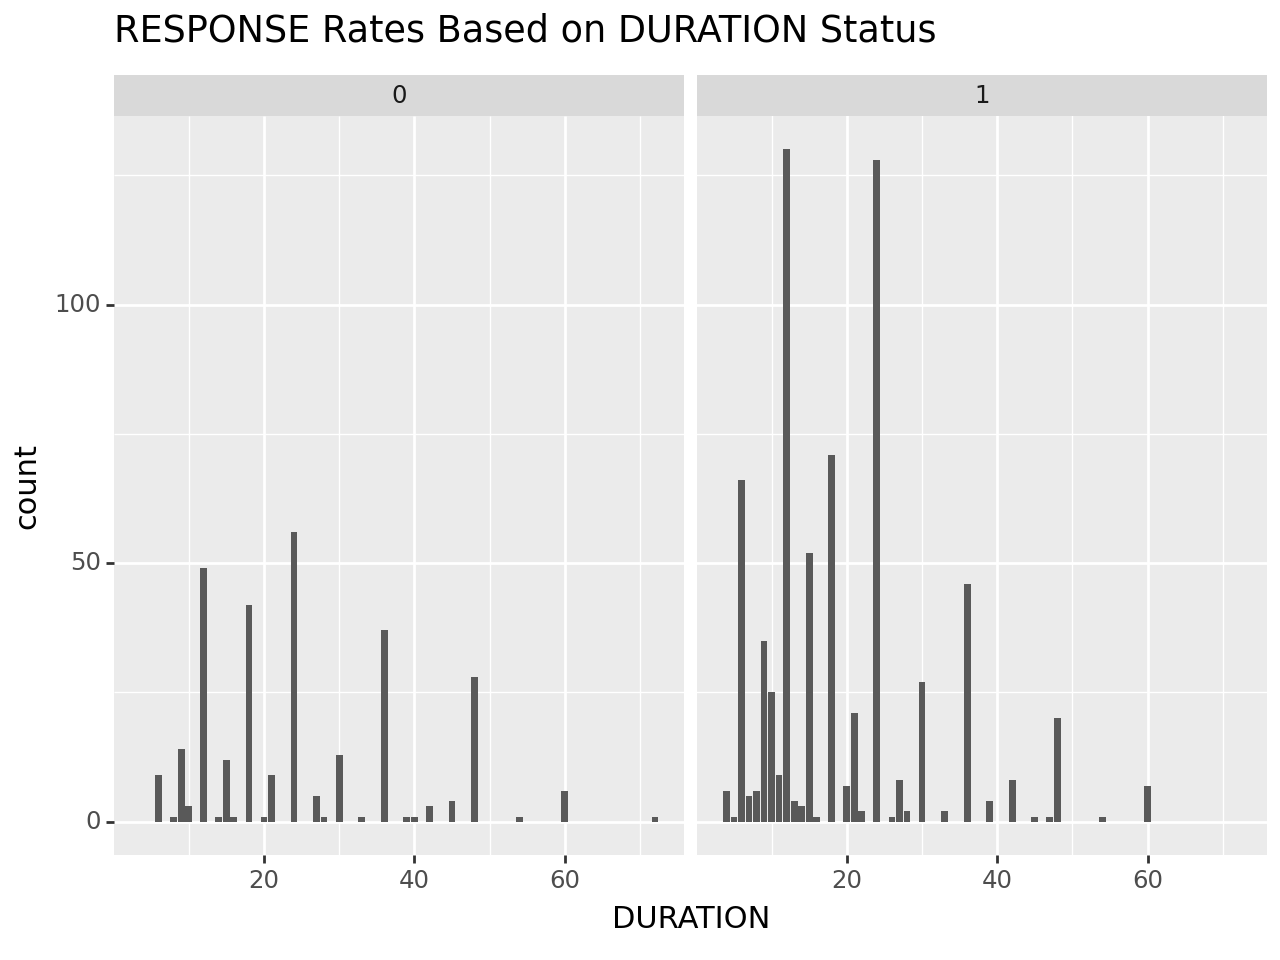

<Figure Size: (640 x 480)>

In [ ]:
#Question 5 Relationship between RESPONSE and DURATION (Loan Duration)
(ggplot(df)
 + facet_grid(facets="~RESPONSE")
 + aes(x='DURATION')
 + geom_bar()
 + ggtitle("RESPONSE Rates Based on DURATION Status")
)
#Longer loan durations may be associated with a higher risk of default, while shorter loan terms seem to correlate with better loan repayment behavior.

In [ ]:
duration_dummies = pd.get_dummies(df['DURATION'], prefix='DURATION', dtype=float)
df = df.join(duration_dummies)
df

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,DURATION_36,DURATION_39,DURATION_40,DURATION_42,DURATION_45,DURATION_47,DURATION_48,DURATION_54,DURATION_60,DURATION_72
0,0,6,4,0,0,0,1,0,0,1169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,48,2,0,0,0,1,0,0,5951,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,12,4,0,0,0,0,1,0,2096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,42,2,0,0,1,0,0,0,7882,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,24,3,1,0,0,0,0,0,4870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0,30,2,0,1,0,0,0,0,3857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,3,12,2,0,0,0,1,0,0,804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0,45,2,0,0,0,1,0,0,1845,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.corr(numeric_only = True)

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,DURATION_36,DURATION_39,DURATION_40,DURATION_42,DURATION_45,DURATION_47,DURATION_48,DURATION_54,DURATION_60,DURATION_72
CHK_ACCT,1.000000,-0.072013,0.192191,-0.069559,0.064303,-0.098016,0.110632,0.007848,0.021587,-0.042705,...,0.000314,0.001297,-0.039693,-0.040783,-0.055097,-0.039693,-0.058413,0.015064,0.003505,-0.014523
DURATION,-0.072013,1.000000,-0.077186,-0.109999,0.144939,-0.062804,-0.044319,0.003750,0.164113,0.624984,...,0.376841,0.106437,0.050130,0.184600,0.141726,0.068505,0.504819,0.122928,0.372280,0.134130
HISTORY,0.192191,-0.077186,1.000000,0.042480,0.039096,-0.025539,0.021396,0.054039,-0.090091,-0.059905,...,-0.000787,0.029794,0.042523,0.000044,-0.009495,-0.015928,-0.087115,-0.105239,-0.017003,-0.015928
NEW_CAR,-0.069559,-0.109999,0.042480,1.000000,-0.187291,-0.259831,-0.344672,-0.126799,-0.181149,-0.040793,...,-0.029298,-0.039180,-0.017487,-0.058290,-0.039180,0.057243,-0.046761,-0.024742,0.040828,-0.017487
USED_CAR,0.064303,0.144939,0.039096,-0.187291,1.000000,-0.159301,-0.211317,-0.077740,-0.111062,0.252101,...,0.065004,0.069265,-0.010721,0.027347,0.022622,-0.010721,0.047033,0.058469,-0.038890,-0.010721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DURATION_47,-0.039693,0.068505,-0.015928,0.057243,-0.010721,-0.014874,-0.019730,-0.007258,-0.010370,0.083553,...,-0.009519,-0.002243,-0.001001,-0.003337,-0.002243,1.000000,-0.007104,-0.001416,-0.003631,-0.001001
DURATION_48,-0.058413,0.504819,-0.087115,-0.046761,0.047033,-0.069110,-0.035841,0.012879,0.131888,0.329045,...,-0.067555,-0.015918,-0.007104,-0.023681,-0.015918,-0.007104,1.000000,-0.010052,-0.025770,-0.007104
DURATION_54,0.015064,0.122928,-0.105239,-0.024742,0.058469,-0.021045,-0.027917,-0.010270,0.060957,0.149456,...,-0.013468,-0.003173,-0.001416,-0.004721,-0.003173,-0.001416,-0.010052,1.000000,-0.005138,-0.001416
DURATION_60,0.003505,0.372280,-0.017003,0.040828,-0.038890,-0.053952,0.007078,0.014177,0.022044,0.272645,...,-0.034528,-0.008136,-0.003631,-0.012104,-0.008136,-0.003631,-0.025770,-0.005138,1.000000,-0.003631


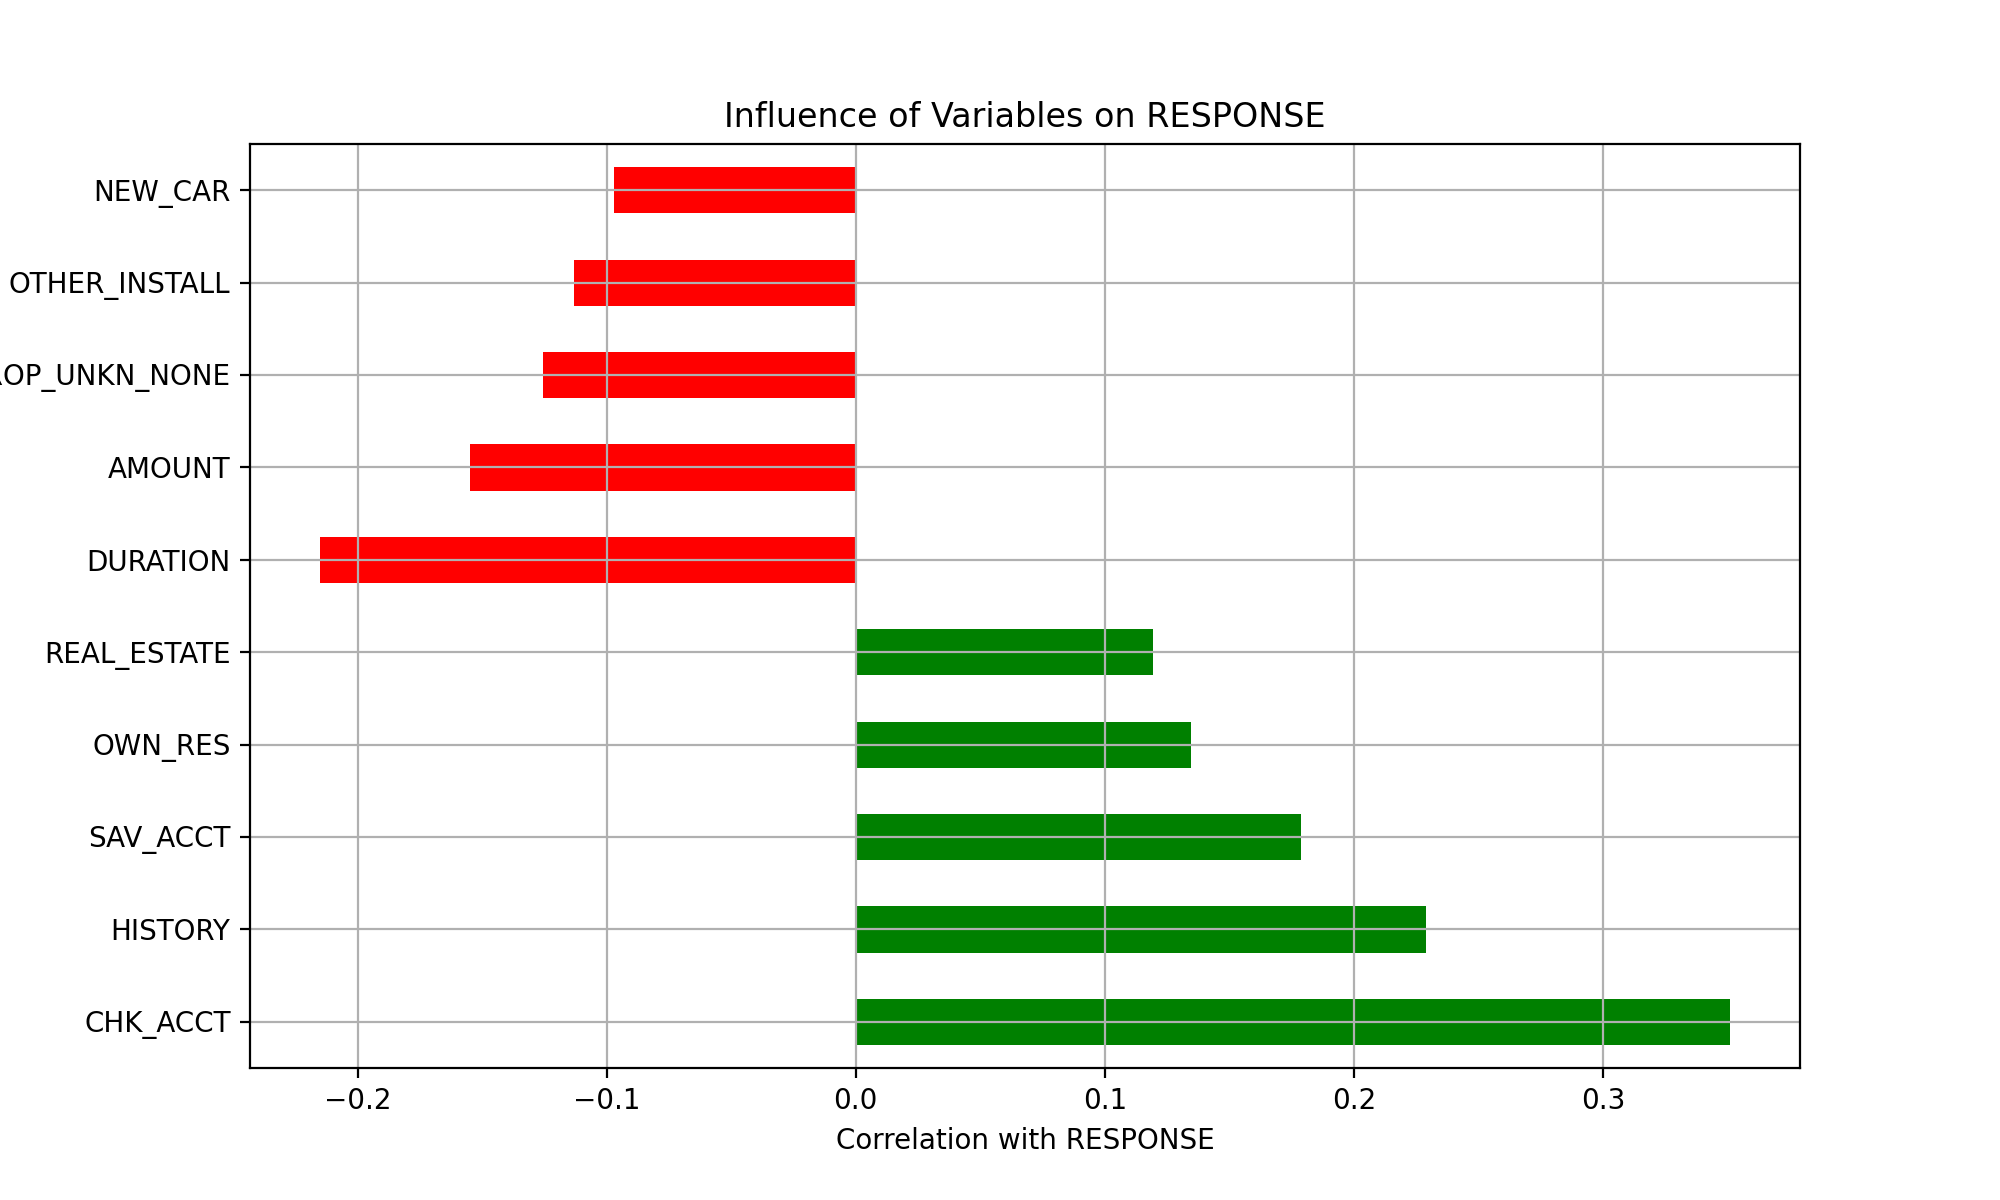

In [ ]:
# Question 6: Variables like REAL_ESTATE, OWN_RES, SAV_ACCT, HISTORY, and CHK_ACCT appear to be the most influential in determining whether someone will
# repay their loan or default, based on both common sense and the data analysis we've conducted.


correlation_matrix = df.corr(numeric_only=True)
response_correlations = correlation_matrix['RESPONSE'].sort_values(ascending=False)

influential_vars = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'OWN_RES', 'REAL_ESTATE', 'DURATION', 'AMOUNT', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'NEW_CAR']
correlation_df = response_correlations[influential_vars]

plt.figure(figsize=(10, 6))
correlation_df.plot(kind='barh', color=['green' if x > 0 else 'red' for x in correlation_df])
plt.title('Influence of Variables on RESPONSE')
plt.xlabel('Correlation with RESPONSE')
plt.ylabel('Variables')
plt.grid(True)

In [ ]:
# Question 7: Be very specific. What are the characteristics of the people who have paid back? Be very
# specific. What are the characteristics of the people who have defaulted on loans?

response_stats = df.groupby('RESPONSE').mean(numeric_only=True)
print(response_stats)

          CHK_ACCT   DURATION   HISTORY   NEW_CAR  USED_CAR  FURNITURE  \
RESPONSE                                                                 
0         0.903333  24.860000  2.166667  0.296667  0.056667   0.193333   
1         1.865714  19.207143  2.707143  0.207143  0.122857   0.175714   

          RADIO/TV  EDUCATION  RETRAINING       AMOUNT  ...  PROP_UNKN_NONE  \
RESPONSE                                                ...                   
0         0.206667   0.073333    0.113333  3938.126667  ...        0.223333   
1         0.311429   0.040000    0.090000  2985.457143  ...        0.124286   

                AGE  OTHER_INSTALL      RENT   OWN_RES  NUM_CREDITS       JOB  \
RESPONSE                                                                        
0         33.963333       0.253333  0.233333  0.620000     1.366667  1.936667   
1         36.224286       0.157143  0.155714  0.752857     1.424286  1.890000   

          NUM_DEPENDENTS  TELEPHONE   FOREIGN  
RESPONSE     

In [ ]:
# People who pay back loans typically have stable jobs, good credit history,
# stable checking account balances, smaller loan amounts, and
# shorter loan durations. On the other hand, those who default tend to have poorer credit history,
# less stable financial situations (lower checking account status), longer loan durations,
# larger loan amounts, and less stable employment. These patterns indicate that financial stability,
# manageable loan sizes, and a strong credit history are crucial for successfully repaying loans,
# whereas larger financial commitments and job instability increase the likelihood of default

In [ ]:
# What is your general recommendation for the German bank?




# To minimize defaults, the bank should focus on lending to individuals with stable jobs,
# good credit histories, and positive checking account statuses. Limiting loan amounts
# to what is manageable for the borrower and offering shorter loan durations may reduce the risk of default.
# Additionally, borrowers with lower credit scores or unstable financial situations should be
# subjected to stricter lending criteria or offered loans with higher interest rates to compensate
# for the increased risk. The bank could also provide financial education to
# improve borrowers' financial management skills, helping them avoid default.